In this notebook I will plot the correlations between the covariances of the MSA of a given test dataset and the ones of the data generated from the different models. The samples have to be already generated and have the name indicate in the file

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import torch
import scipy
import pandas as pd
import seaborn

## To do so one has to have generated the different correlations for the different models. Then he can load them as below

In [2]:
res_corr_potts_structure = torch.load("res_potts_structure_10k_old.pt")
res_corr_potts_superfamily = torch.load("res_potts_superfamily_10k_old.pt")

res_corr_esm_structure = torch.load("res_corr_esm_structure_10k.pt")
res_corr_esm_superfamily = torch.load("res_corr_esm_superfamily_10k.pt")

res_corr_ardca_superfamily = torch.load("res_ardca_superfamily_10k.pt")
res_corr_ardca_structure = torch.load("res_ardca_structure_10k.pt")


In [10]:
import seaborn as sns
import seaborn.distributions as sd
from seaborn.palettes import color_palette, blend_palette
from six import string_types


def _bivariate_kdeplot(x, y, filled, fill_lowest,
                       kernel, bw, gridsize, cut, clip,
                       axlabel, cbar, cbar_ax, cbar_kws, ax, **kwargs):
    """Plot a joint KDE estimate as a bivariate contour plot."""
    # Determine the clipping
    if clip is None:
        clip = [(-np.inf, np.inf), (-np.inf, np.inf)]
    elif np.ndim(clip) == 1:
        clip = [clip, clip]

    # Calculate the KDE
    if sd._has_statsmodels:
        xx, yy, z = sd._statsmodels_bivariate_kde(x, y, bw, gridsize, cut, clip)
    else:
        xx, yy, z = sd._scipy_bivariate_kde(x, y, bw, gridsize, cut, clip)

    # Plot the contours
    n_levels = kwargs.pop("n_levels", 10)
    cmap = kwargs.get("cmap", "BuGn" if filled else "BuGn_d")
    if isinstance(cmap, string_types):
        if cmap.endswith("_d"):
            pal = ["#333333"]
            pal.extend(color_palette(cmap.replace("_d", "_r"), 2))
            cmap = blend_palette(pal, as_cmap=True)
        else:
            cmap = plt.cm.get_cmap(cmap)

    kwargs["cmap"] = cmap
    contour_func = ax.contourf if filled else ax.contour
    cset = contour_func(xx, yy, z, n_levels, **kwargs)
    if filled and not fill_lowest:
        cset.collections[0].set_alpha(0)
    kwargs["n_levels"] = n_levels

    if cbar:
        cbar_kws = {} if cbar_kws is None else cbar_kws
        ax.figure.colorbar(cset, cbar_ax, ax, **cbar_kws)

    # Label the axes
    if hasattr(x, "name") and axlabel:
        ax.set_xlabel(x.name)
    if hasattr(y, "name") and axlabel:
        ax.set_ylabel(y.name)

    return ax, cset

In [8]:
res_corr_potts_structure.keys()

dict_keys(['Ns', 'Ms', 'corr'])

In [11]:
Ns_str = res_corr_ardca_structure['Ns']
Ms_str = res_corr_ardca_structure['Ms']
Ms_esm = res_corr_esm_structure['Ms']
Ns_esm = res_corr_esm_structure['Ns']
Ns_potts = res_corr_potts_structure['Ns']
Ms_potts = res_corr_potts_structure['Ms']

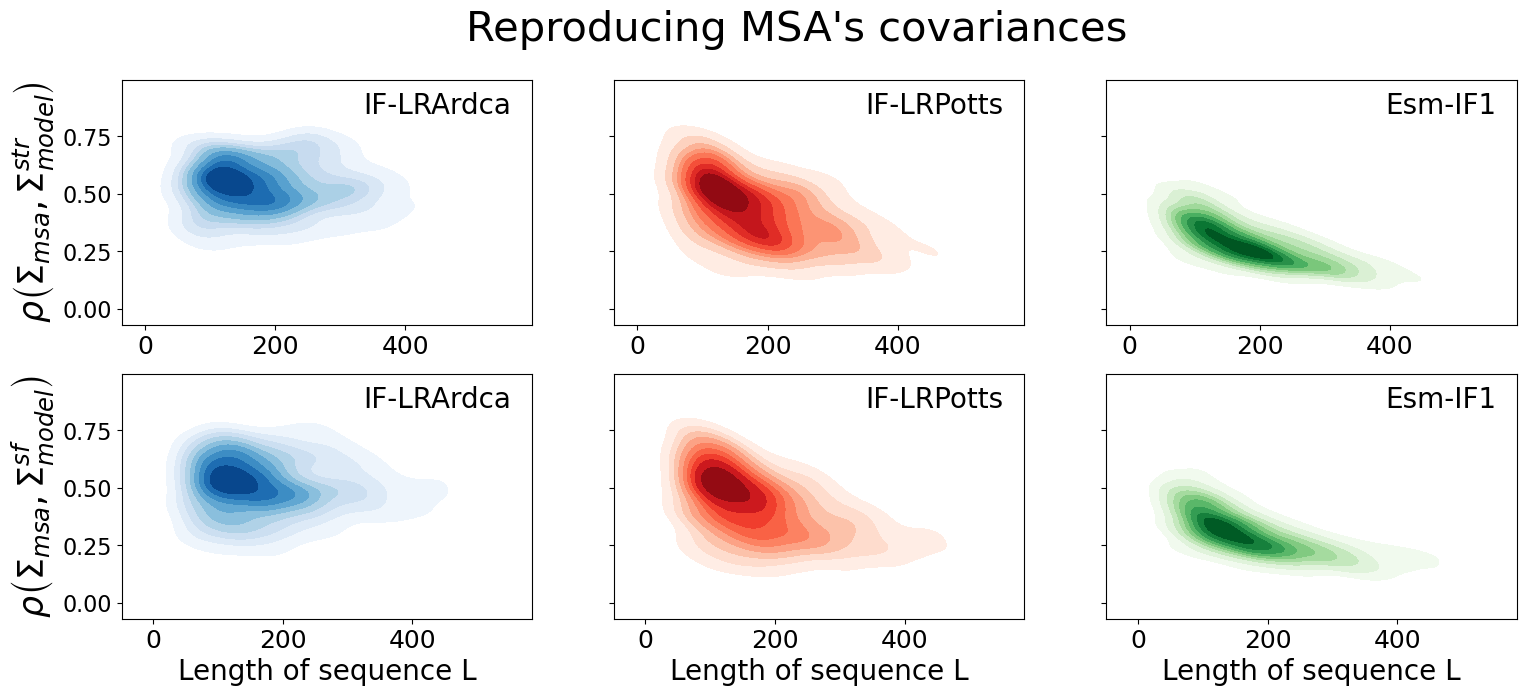

In [28]:
Ns_str_ar = res_corr_ardca_structure['Ns']
Ns_str_esm = res_corr_esm_structure['Ns']
Ns_str_pt = res_corr_potts_structure['Ns']

Ns_sf_ar = res_corr_ardca_superfamily['Ns']
Ns_sf_esm = res_corr_esm_superfamily['Ns']
Ns_sf_pt = res_corr_potts_superfamily['Ns']


# monkey patching
sd._bivariate_kdeplot = _bivariate_kdeplot

fig, ([[ax1, ax2, ax3], [ax4,ax5,ax6]]) = plt.subplots(nrows=2, ncols=3, figsize=(18, 7), sharey=True)
fig.suptitle("Reproducing MSA's covariances", size=30)
ax1.set_xlabel(" ", size=0)
ax2.set_xlabel(" ", size=0)
ax3.set_xlabel(" ", size=0)
ax5.set_xlabel("Length of sequence L", size=20)
ax4.set_xlabel("Length of sequence L", size=20)
ax6.set_xlabel("Length of sequence L", size=20)


ax1.set_ylabel(r"$\rho$$\left(\Sigma_{msa}, \Sigma_{model}^{str}\right)$", size=25)
ax4.set_ylabel(r"$\rho$$\left(\Sigma_{msa}, \Sigma_{model}^{sf}\right)$", size=25)




sns.kdeplot(x=Ns_str_ar, y=res_corr_ardca_structure['corr'], cmap='Blues', fill=True, thresh=0.075, ax=ax1)
ax1.text(0.95, 0.95, "IF-LRArdca", ha='right', va='top', transform=ax1.transAxes, size=20)

sns.kdeplot(x=Ns_sf_ar, y=res_corr_ardca_superfamily['corr'], cmap='Blues', fill=True, thresh=0.075, ax=ax4)
ax4.text(0.95, 0.95, "IF-LRArdca", ha='right', va='top', transform=ax4.transAxes, size=20)

sns.kdeplot(x=Ns_str_pt, y=res_corr_potts_structure['corr'], cmap='Reds', fill=True, thresh=0.075, ax=ax2)
ax2.text(0.95, 0.95, "IF-LRPotts", ha='right', va='top', transform=ax2.transAxes, size=20)

sns.kdeplot(x=Ns_sf_pt, y=res_corr_potts_superfamily['corr'], cmap='Reds', fill=True, thresh=0.075, ax=ax5)
ax5.text(0.95, 0.95, "IF-LRPotts", ha='right', va='top', transform=ax5.transAxes, size=20)

sns.kdeplot(x=Ns_str_esm, y=res_corr_esm_structure['corr_esm'], cmap='Greens', fill=True, thresh=0.075, ax=ax3)
ax3.text(0.95, 0.95, "Esm-IF1", ha='right', va='top', transform=ax3.transAxes, size=20)

sns.kdeplot(x=Ns_sf_esm, y=res_corr_esm_superfamily['corr_esm'], cmap='Greens', fill=True, thresh=0.075, ax=ax6)
ax6.text(0.95, 0.95, "Esm-IF1", ha='right', va='top', transform=ax6.transAxes, size=20)

ax1.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='x', labelsize=18)
ax3.tick_params(axis='x', labelsize=18)
ax4.tick_params(axis='x', labelsize=18)
ax5.tick_params(axis='x', labelsize=18)
ax6.tick_params(axis='x', labelsize=18)


ax1.tick_params(axis='y', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax3.tick_params(axis='y', labelsize=16)
ax4.tick_params(axis='y', labelsize=16)
ax5.tick_params(axis='y', labelsize=16)
ax6.tick_params(axis='y', labelsize=16)

#fig.savefig("./figs/comparison_joint_new.png", format="png")